# Simulation Func for Regression 

In [1]:
import pandas as pd
import numpy as np
import lifelines as ll
import sksurv as sks
import matplotlib.pyplot as plt
from bart_survival import surv_bart as sb
from bart_survival import simulation as sm
import lifelines as ll
from lifelines import KaplanMeierFitter
import subprocess
import importlib

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [ ]:
import sys
sys.path.append("../py/")
import _conditions1 as cn
import _functions1 as fn
import _sim_iter1 as si
import _plot_fx as pltf
#s

In [28]:
reg_1 = {
    # "type": "Simple, 1 group, 20% cens",
    "x_vars": 9, 
    "VAR_CLASS": [2,2,2,2,2,2,2,2,2],
    "VAR_PROB":[.5,.5,.5,.5,.5,.5,.5,.5,.5],
    # "scale_f": "2.5*x_mat[:,0]",
    "scale_f": "np.exp(3 + 0.1*(x_mat[:,0] + x_mat[:,1] + x_mat[:,2] + x_mat[:,3] + x_mat[:,4] + x_mat[:,5]) + x_mat[:,6])",
    "shape_f": "2",
    "cens_scale":None
}

In [32]:
rng = np.random.default_rng(99)
x_mat = sm.get_x_matrix(
    N = 400, 
    x_vars = reg_1["x_vars"], 
    VAR_CLASS=reg_1["VAR_CLASS"],
    VAR_PROB=reg_1["VAR_PROB"],
    rng=rng
    )
event, sv_true, sv_scale_true = sm.simulate_survival(
    x_mat = x_mat,
    scale_f=reg_1["scale_f"],
    shape_f=reg_1["shape_f"],
    rng=rng
)


mean shape 2.0
mean scale 53.01830024456679
mean time draws 46.867921193954295


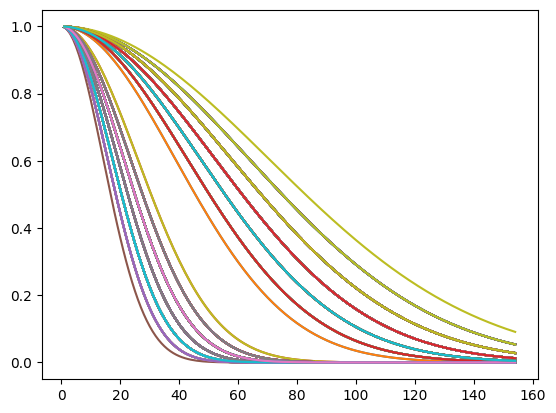

In [33]:
sv = sv_true["sv_true"]
ttt = sv_true["true_times"]
for i in range(400):
    plt.plot(ttt, sv[i,:])

In [42]:
reg_1 = {
    # "type": "Simple, 1 group, 20% cens",
    "x_vars": 9, 
    "VAR_CLASS": [2,2,2,2,2,2,2,2,2],
    "VAR_PROB":[.5,.5,.5,.5,.5,.5,.5,.5,.5],
    "scale_f": "20 + 5*(x_mat[:,0] + x_mat[:,1] + x_mat[:,2] + x_mat[:,3] + x_mat[:,4] + x_mat[:,5] + 10*x_mat[:,6])",
    "shape_f": "0.7 + 1.3*x_mat[:,6]",
    "cens_scale":None
}

In [43]:
rng = np.random.default_rng(99)
x_mat = sm.get_x_matrix(
    N = 400, 
    x_vars = reg_1["x_vars"], 
    VAR_CLASS=reg_1["VAR_CLASS"],
    VAR_PROB=reg_1["VAR_PROB"],
    rng=rng
    )
event, sv_true, sv_scale_true = sm.simulate_survival(
    x_mat = x_mat,
    scale_f=reg_1["scale_f"],
    shape_f=reg_1["shape_f"],
    rng=rng
)


mean shape 1.402
mean scale 62.6375
mean time draws 59.562302359128736


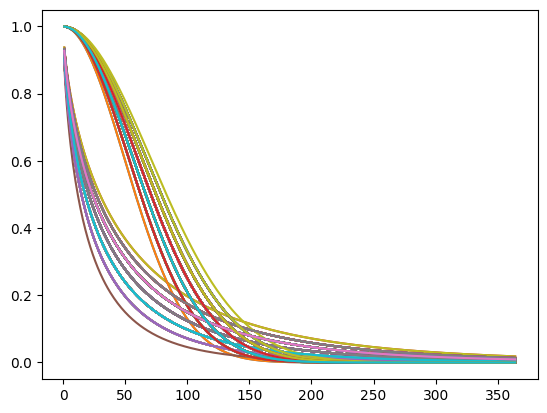

In [45]:
sv = sv_true["sv_true"]
ttt = sv_true["true_times"]
for i in range(400):
    plt.plot(ttt, sv[i,:])

# Complex Regression

In [50]:
reg_1 = {
    # "type": "Simple, 1 group, 20% cens",
    "x_vars": 10, 
    "VAR_CLASS": [1,1,1,1,1,1,1,1,1,1],
    "VAR_PROB":[None,None,None,None,None,None,None,None,None,None],
    "scale_f" : "np.exp(3 + 0.5*np.sin(np.pi * x_mat[:,0] * x_mat[:,1]) + np.power((x_mat[:,2]-0.5), 2) + 0.5* x_mat[:,3] + 0.25 * x_mat[:,4])",
    # "scale_f": "20 + 5*(x_mat[:,0] + x_mat[:,1] + x_mat[:,2] + x_mat[:,3] + x_mat[:,4] + x_mat[:,5] + 10*x_mat[:,6])",
    "shape_f": "2",
    "cens_scale":None
}


In [51]:
rng = np.random.default_rng(99)
x_mat = sm.get_x_matrix(
    N = 400, 
    x_vars = reg_1["x_vars"], 
    VAR_CLASS=reg_1["VAR_CLASS"],
    VAR_PROB=reg_1["VAR_PROB"],
    rng=rng
    )
event, sv_true, sv_scale_true = sm.simulate_survival(
    x_mat = x_mat,
    scale_f=reg_1["scale_f"],
    shape_f=reg_1["shape_f"],
    rng=rng
)

mean shape 2.0
mean scale 44.01964734948047
mean time draws 39.93344379031392


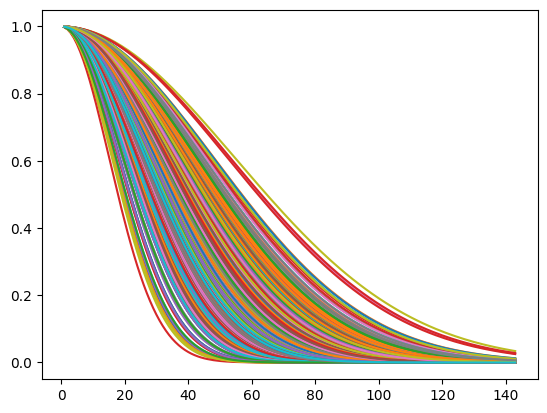

In [52]:
sv = sv_true["sv_true"]
ttt = sv_true["true_times"]
for i in range(400):
    plt.plot(ttt, sv[i,:])